In [1]:
### header ###
__author__ = "Hunter Bennett"
__license__ = "BSD"
__email__ = "hunter.r.bennett@gmail.com"
%load_ext autoreload
%autoreload 2
%matplotlib inline
### imports ###
import sys
import os
import re
import glob
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt 
import seaborn as sns

matplotlib.rcParams['savefig.dpi'] = 200
sys.setrecursionlimit(3000)
sns.set(font_scale=1)
sns.set_context('talk')
sns.set_style('white')

# import custom functions
sys.path.insert(0, '/home/h1bennet/code/')
from hbUtils import ngs_qc, quantile_normalize_df
from homer_preprocessing import read_homer_gene_exp, import_homer_diffgene, pull_comparisons_get_diff
from plotting_scripts import label_point, pca_rpkm_mat, get_diff_volcano, plot_exp_rpkm, gene_list_bar_plot

In [2]:
workingDirectory = '/home/h1bennet/strains_rna/results/L00_Strains_Control_LSEC_RNA/'
dataDirectory = '/home/h1bennet/strains/data/RNA/control_lsec'
if not os.path.isdir(workingDirectory):
    os.mkdir(workingDirectory)
os.chdir(workingDirectory)


# Check qc stats

In [3]:
qc = ngs_qc('/home/h1bennet/strains/data/RNA/control_lsec')

/home/h1bennet/strains/data/RNA/control_lsec/
./control_lsec_qc/


<Figure size 432x288 with 0 Axes>

In [4]:
qc

,uniquePositions,fragmentLengthEstimate,tagsPerBP,clonality,GC_Content,totalReads,uniquelyMappedReads,multiMappedReads,frac_unmappedReads_mismatch,frac_unmappedReads_short,frac_unmappedReads_other,uniquelyMappedFraction,mappedFraction
AJ_M_LSEC_RNA_AJ01A_HBENN_l20201124_TACCGAGG_CCTGAACT.aj.star_shifted_from_AJ.sam,4706841.0,75.0,0.003157,1.825,2.721584e+09,9726144.0,8591204.0,522160.0,0.0,0.0535,0.0037,0.883310,0.9428
AJ_M_LSEC_RNA_AJ01B_HBENN_l20201124_CGTTAGAA_TTCAGGTC.aj.star_shifted_from_AJ.sam,5013272.0,75.0,0.003789,2.057,2.721897e+09,11589227.0,10314088.0,637268.0,0.0,0.0449,0.0042,0.889972,0.9509
AJ_M_LSEC_RNA_AJ01C_HBENN_l20201124_AGCCTCAT_AGTAGAGA.aj.star_shifted_from_AJ.sam,7277467.0,75.0,0.006947,2.597,2.720757e+09,20329897.0,18900120.0,1093970.0,0.0,0.0064,0.0045,0.929671,0.9891
AJ_M_LSEC_RNA_AJ01D_HBENN_l20201124_GATTCTGC_GACGAGAG.aj.star_shifted_from_AJ.sam,6625975.0,75.0,0.005157,2.118,2.721152e+09,15121849.0,14032414.0,760215.0,0.0,0.0117,0.0044,0.927956,0.9839
BALBC_M_LSEC_RNA_BALB01A_HBENN_l20201124_TCGTAGTG_AGACTTGG.balbcj.star_shifted_from_BALBCJ.sam,7037785.0,75.0,0.005719,2.211,2.721487e+09,17000928.0,15563949.0,1041083.0,0.0,0.0114,0.0041,0.915476,0.9845
BALBC_M_LSEC_RNA_BALB01B_HBENN_l20201124_CTACGACA_GAGTCCAA.balbcj.star_shifted_from_BALBCJ.sam,5920730.0,75.0,0.004955,2.277,2.720454e+09,14974401.0,13479888.0,853054.0,0.0,0.0330,0.0040,0.900195,0.9630
BALBC_M_LSEC_RNA_BALB01C_HBENN_l20201124_TAAGTGGT_CTTAAGCC.balbcj.star_shifted_from_BALBCJ.sam,7421259.0,75.0,0.006480,2.376,2.721375e+09,18990506.0,17634997.0,986437.0,0.0,0.0077,0.0048,0.928622,0.9875
BALBC_M_LSEC_RNA_BALB01D_HBENN_l20201124_CGGACAAC_TCCGGATT.balbcj.star_shifted_from_BALBCJ.sam,7327959.0,75.0,0.005508,2.046,2.721579e+09,16477818.0,14991248.0,1006112.0,0.0,0.0184,0.0042,0.909784,0.9774
C57B6J_M_LSEC_RNA_C5701A_HBENN_l20201124_ATATGGAT_CTGTATTA,7237137.0,75.0,0.005849,2.200,4.810000e-01,18211635.0,15918830.0,1090304.0,0.0,0.0540,0.0048,0.874102,0.9412
C57B6J_M_LSEC_RNA_C5701B_HBENN_l20201124_GCGCAAGC_TCACGCCG,6852539.0,75.0,0.005025,1.996,4.850000e-01,15206153.0,13676416.0,931650.0,0.0,0.0262,0.0048,0.899400,0.9690


# Run Oyoung's pipeline to process RNA-seq data consistantly.

In [5]:
c57_paths = list(np.sort(glob.glob(dataDirectory+'/C57*')))
balbc_paths = list(np.sort(glob.glob(dataDirectory+'/BALBC*')))
aj_paths = list(np.sort(glob.glob(dataDirectory+'/AJ*')))

In [6]:
c57_ids = [i.split('/')[-1].split('_')[4] for i in c57_paths]
balbc_ids = [i.split('/')[-1].split('_')[4] for i in balbc_paths]
aj_ids = [i.split('/')[-1].split('_')[4] for i in aj_paths]

In [7]:
ids = ['c57_lsec_control_young',
       'balbc_lsec_control_young',
       'aj_lsec_control_young']
colors = ['#31a354',
          '#3182bd',
          '#de2d26']
paths = [';'.join(c57_paths),
         ';'.join(balbc_paths),
         ';'.join(aj_paths)]
short_ids = [';'.join([ids[0]+'_'+i for i in c57_ids]),
             ';'.join([ids[1]+'_'+i for i in balbc_ids]),
             ';'.join([ids[2]+'_'+i for i in aj_ids])]

In [8]:
pd.DataFrame([ids,colors,paths,short_ids]).T.to_csv('./sampleDef.txt',
                                                    sep='\t',
                                                    header=False,
                                                    index=False)

# Run O'young RNA pipeline

Run the code below in BASH

    source activate r-ouyangPipe
    
    mkdir ./expression/
    
    mkdir ./differential/
    
    rnaQuan.R ./sampleDef.txt -o ./expression/

    rnaDiff.R ./sampleDef.txt -c ./expression/rawC.txt \
    -t ./expression/rawT.txt -o ./differential/

    # annotate scatter files with tag counts
    for scatter in ./differential/*scatter.txt;
    do diff2Homer.R -d $scatter -q ./expression/HOMER.rawTPM.txt;
    done

### Make sure to check the PCA pdf file for outliers

# Import differential gene files for examination and plotting

In [9]:
if not os.path.isdir('./gene_lists/'):
    os.mkdir('./gene_lists')

In [10]:
strains = ['aj', 'balb', 'c57']
log2fc = 1
padj = 0.05

In [11]:
gene_list_dict ={}

In [12]:
for strain in strains:
    # initialize gene lists
    g_intersect = set()
    g_union = set()
    for i in glob.glob('./differential/'+strain+'*homer.txt'):
        print(i)
        # read in gene expression data
        df, tpm, tpm_mat, tpm_mat_quant = import_homer_diffgene(
            depath=i,
            gepath='./expression/HOMER.rawTPM.txt',
            gene_name_index=True)

        # select differential genes
        df = df.loc[~(df.chr.str.contains('chrX|chrY|ChrUn')), :]
        sig_genes = df.index[(df['padj'] < padj) & (df['log2FoldChange'] <= -log2fc)].to_list()
        
        # add to sets
        if len(g_union) == 0:
            g_union = set(sig_genes)
            g_intersect = set(sig_genes)
        else:
            g_union = g_union.union(sig_genes)
            g_intersect = g_intersect.intersection(sig_genes)
        
        # print('union set length:', print(len(g_union)))
        # print('intersection set length:', print(len(g_intersect)))
    
    # after getting union and intersection sets add to dict
    gene_list_dict[strain+'_union'] = list(g_union)
    gene_list_dict[strain+'_intersection'] = list(g_intersect)
        

./differential/aj_lsec_control_young.vs.balbc_lsec_control_young.scatter.homer.txt
ge all transcripts (24940, 19)
Diff Gene selected transcripts (8925, 14)
ge selected transcripts (8925, 19)
./differential/aj_lsec_control_young.vs.c57_lsec_control_young.scatter.homer.txt
ge all transcripts (24940, 19)
Diff Gene selected transcripts (8953, 14)
ge selected transcripts (8953, 19)
./differential/balbc_lsec_control_young.vs.aj_lsec_control_young.scatter.homer.txt
ge all transcripts (24940, 19)
Diff Gene selected transcripts (8925, 14)
ge selected transcripts (8925, 19)
./differential/balbc_lsec_control_young.vs.c57_lsec_control_young.scatter.homer.txt
ge all transcripts (24940, 19)
Diff Gene selected transcripts (8903, 14)
ge selected transcripts (8903, 19)
./differential/c57_lsec_control_young.vs.aj_lsec_control_young.scatter.homer.txt
ge all transcripts (24940, 19)
Diff Gene selected transcripts (8953, 14)
ge selected transcripts (8953, 19)
./differential/c57_lsec_control_young.vs.balbc_l

In [13]:
for key in gene_list_dict.keys():
    print(key)
    print(len(gene_list_dict[key]), 'genes')
    with open('./gene_lists/'+key+'_lsec_genes_fc_'+str(log2fc)+'_pval_'+str(padj)+'.txt', 'w') as f:
        f.write('Gene\n')
        for i in gene_list_dict[key]:
            f.write(i+'\n')
        f.close()

aj_union
186 genes
aj_intersection
33 genes
balb_union
184 genes
balb_intersection
36 genes
c57_union
248 genes
c57_intersection
85 genes


# Plot potential nichenet ligands

In [14]:
if not os.path.isdir('./figures/'):
    os.mkdir('./figures')

Read in raw expression values

In [26]:
tpm_mat = pd.read_csv('./expression/rawT.txt', sep='\t', index_col=0)

Read in nichenet ligand list

In [27]:
ligands = pd.read_csv('/home/h1bennet/data/gene_lists/nichenet_ligands.txt',
                      sep='\t')['x'].str.capitalize().tolist()
ligands[:5]

['Cxcl1', 'Cxcl2', 'Cxcl3', 'Cxcl5', 'Ppbp']

### Intersection gene set

In [28]:
act = []
for key in gene_list_dict.keys():
    if 'intersection' in key:
        act.extend(gene_list_dict[key])

act = set(act)
# overlap with ligands
act_ligands = act.intersection(ligands)

In [29]:
act_ligands

{'Pdgfb'}

In [30]:
groups = [[0,1,2,3],
          [4,5,6,7],
          [8,9,10,11]]

group_labels = ['C57BL/6J LSEC Control young',
                'Balb/cJ LSEC Control young',
                'AJ LSEC Control young']

colors = ['#74c476',
          '#6baed6',
          '#de2d26']


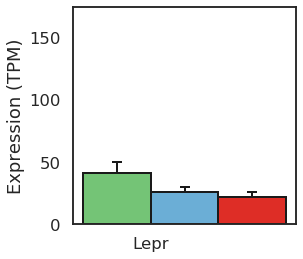

In [31]:
fig, ax = plt.subplots(figsize=(4, 4))

gene_list_bar_plot(['Lepr'],
                   tpm_mat,
                   groups=groups,
                   group_labels = group_labels,
                   colors = colors,
                   ax=ax)

ax.set_ylim([0,175])

ax.get_legend().remove()

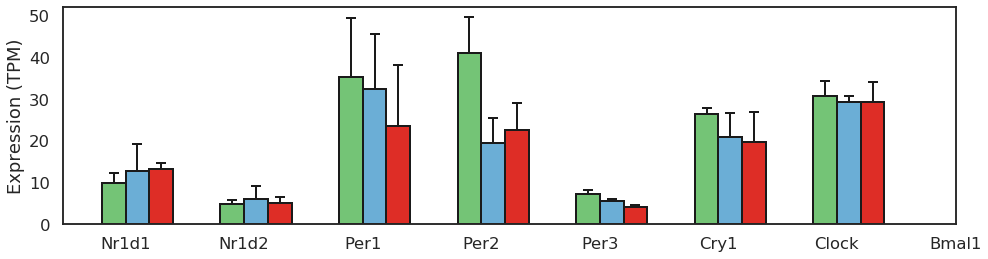

In [33]:
gene = ['Nr1d1', 'Nr1d2', 'Per1', 'Per2', 'Per3', 'Cry1', 'Clock', 'Bmal1']

fig, ax = plt.subplots(1, 1,
                       figsize=(16, 4))

gene_list_bar_plot(gene,
                   tpm_mat,
                   groups=groups,
                   group_labels = group_labels,
                   colors = colors,
                   width=0.2, 
                   # relative='True',
                   ax=ax)

ax.get_legend().remove()

Only one value in activated ligands so we can just do a barplot :O 

In [21]:
# sns.clustermap(
#     np.log2(tpm_mat.loc[act_ligands]+1),
#     col_cluster=False,
#     #z_score=0,
#     cmap='Reds',
#     #vmin=-2,
#     vmax=8,
#     col_colors = ['#74c476', '#74c476', '#74c476', '#74c476',
#           '#6baed6', '#6baed6', '#6baed6', '#6baed6',
#           '#de2d26', '#de2d26', '#de2d26', '#de2d26'],
#     figsize=(4,6),
#     yticklabels=1)

# plt.savefig('./figures/diff_genes_intersection_ligands_clustermap.png', bbox_inches='tight')
# # plt.close()

# Look at union gene set

In [22]:
act = []
for key in gene_list_dict.keys():
    if 'union' in key:
        act.extend(gene_list_dict[key])

act = set(act)
# overlap with ligands
act_ligands = act.intersection(ligands)

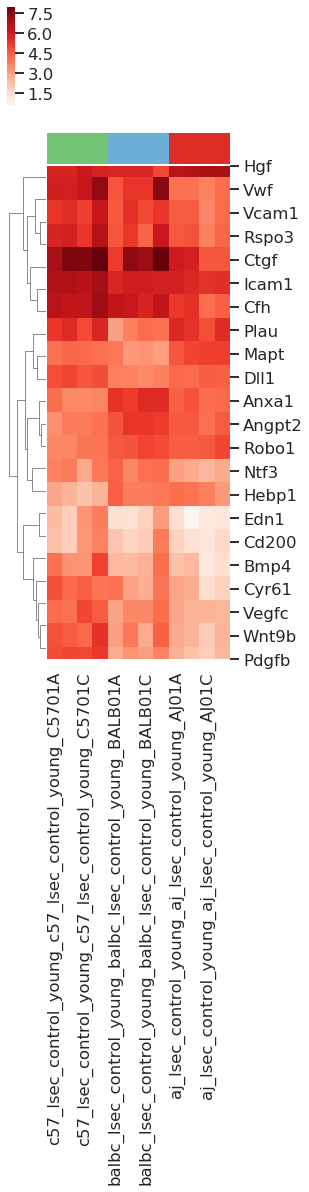

In [23]:
sns.clustermap(
    np.log2(tpm_mat.loc[act_ligands]+1),
    col_cluster=False,
    #z_score=0,
    cmap='Reds',
    #vmin=-2,
    vmax=8,
    col_colors = ['#74c476', '#74c476', '#74c476', '#74c476',
          '#6baed6', '#6baed6', '#6baed6', '#6baed6',
          '#de2d26', '#de2d26', '#de2d26', '#de2d26'],
    figsize=(4,12),
    yticklabels=1)

plt.savefig('./figures/diff_genes_union_ligands_clustermap.png', bbox_inches='tight')
# plt.close()

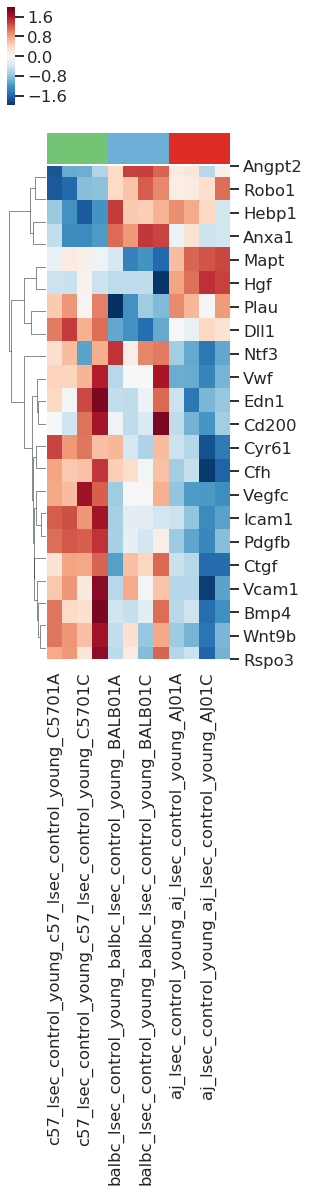

In [24]:
sns.clustermap(
    np.log2(tpm_mat.loc[act_ligands]+1),
    col_cluster=False,
    z_score=0,
    cmap='RdBu_r',
    vmin=-2,
    vmax=2,
    col_colors = ['#74c476', '#74c476', '#74c476', '#74c476',
          '#6baed6', '#6baed6', '#6baed6', '#6baed6',
          '#de2d26', '#de2d26', '#de2d26', '#de2d26'],
    figsize=(4,12),
    yticklabels=1)

plt.savefig('./figures/diff_genes_union_ligands_clustermap_zscore.png', bbox_inches='tight')
# plt.close()